In [16]:
import math
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
# torch.log  and math.log is e based
class WingLoss(nn.Module):
    def __init__(self, omega=10, epsilon=2):
        super(WingLoss, self).__init__()
        self.omega = omega
        self.epsilon = epsilon

    def forward(self, pred, target):
        y = target
        y_hat = pred
        delta_y = (y - y_hat).abs()
        delta_y1 = delta_y[delta_y < self.omega]
        delta_y2 = delta_y[delta_y >= self.omega]
        loss1 = self.omega * torch.log(1 + delta_y1 / self.epsilon)
        C = self.omega - self.omega * math.log(1 + self.omega / self.epsilon)
        loss2 = delta_y2 - C
        return (loss1.sum() + loss2.sum()) / (len(loss1) + len(loss2))

In [2]:
# Input

omega = 5
epsilon = 0.5

In [18]:
# Data

x_arr = np.linspace(-10,10,1000)

In [19]:
# Function

def wing_loss(omega, epsilon, x):
    abs_x = abs(x)
    if abs_x < omega:
        loss = omega*math.log(1+abs_x/epsilon)
    elif abs_x >= omega:
        C = omega - omega*math.log(1+omega/epsilon)
        loss = abs_x - C
    return loss

In [51]:
y_arr = np.array([wing_loss(omega=10, epsilon=0.5, x=x) for x in x_arr])

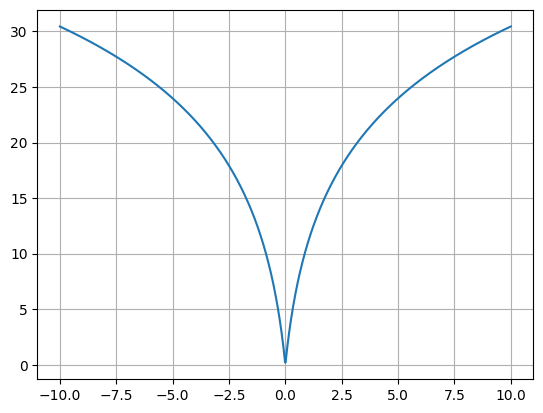

In [52]:
plt.plot(x_arr, y_arr)
plt.grid()